# Titanic Project

### Introduction

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. The dataset provides the information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. <br><br> In this problem, we are using machine learning algorithms to predict if an arbitrary passenger on Titanic would survive the sinking or not based on these features.

### Importing required libraries 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df=pd.read_csv("titanic")

### Exploratory Data Analysis

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This shows the first five rows of the dataset.

In [4]:
df.shape

(891, 12)

There are 891 rows and 12 columns in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This describes the information of the the columns of the dataset. It shows the column names, count and datatype.

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that there are null values in 'Age', 'Cabin' and 'Embarked' columns.

### Handling Missing Values

Age, Cabin, Embarked features has missing values in the data.

##### Age

Filling age values with the column that has a correlation on age.

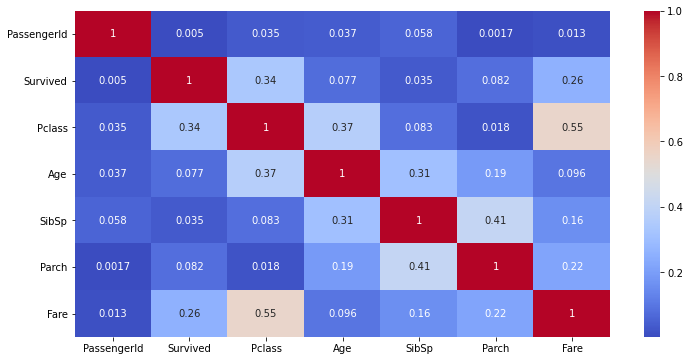

In [7]:
data_corr = df.corr().abs()
plt.figure(figsize=(12, 6))
sns.heatmap(data_corr, annot=True,cmap='coolwarm')
plt.show()

In [8]:
print(df.groupby(['Sex', 'Pclass']).median()['Age'])

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64


<br> Extracting salutations here 

In [9]:
df['Initial']=0
for i in df:
        df['Initial']=df.Name.str.extract('([A-Za-z]+)\.')    

In [10]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


<br> Replacing values according to the above cross tab.

In [11]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                          ['Miss','Miss','Miss','Dr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Miss'],inplace=True)

In [12]:
print(df.groupby(['Sex', 'Pclass','Initial']).median()['Age'])

Sex     Pclass  Initial
female  1       Dr         49.0
                Miss       29.5
                Mrs        41.5
        2       Miss       24.0
                Mrs        32.0
        3       Miss       18.0
                Mrs        31.0
male    1       Dr         44.0
                Master      4.0
                Mr         42.0
        2       Dr         38.5
                Master      1.0
                Mr         31.0
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64


<br>Filling the age values based on median value for Pclass and Sex

In [13]:
df['Age'] = df.groupby(['Sex','Pclass','Initial'])['Age'].apply(lambda x:x.fillna(x.median()))

##### Embarked Features

In [14]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [15]:
print(df.groupby(['Embarked','Pclass'])['Pclass'].count())

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: Pclass, dtype: int64


In [16]:
print(df.groupby(['Embarked','Sex'])['Pclass'].count())

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: Pclass, dtype: int64


<br>Observation:<br>
* Most of the first class passenger embarked on S((Southampton))<br>
* Most of the Female also embarked on S((Southampton))<br>
* We have 2 missing values on Embarked which these passengers both female and first class so filling this empty values with S((Southampton))

<br>Filling the Embarked feature with 'S'

In [17]:
df['Embarked'] = df['Embarked'].fillna('S')

<br>

##### Cabin Feature

Dropping this feature because it has lot of missing values.


In [18]:
df.drop(['Cabin'], axis=1, inplace=True)

In [19]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Initial        0
dtype: int64


We can see that the Cabin column is dropped.<br><br>

##### Checking surviver rate

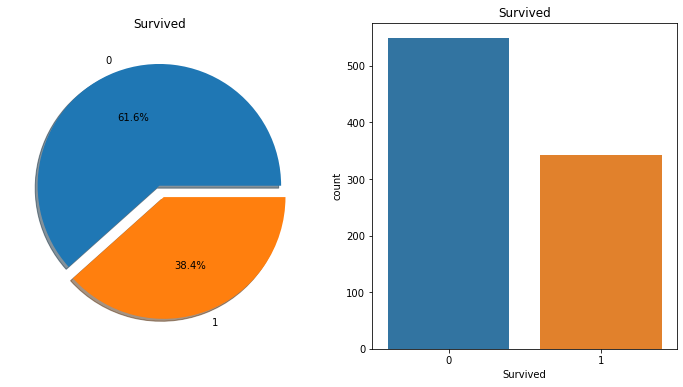

In [20]:
f,ax=plt.subplots(1,2,figsize=(12,6))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

* These plots shows that not many passengers survived the accident.<br>
* Out of 891 passengers in dataset, only around 350 (38.4% ) people survived of the total dataset.<br><br>

###### 'Sex'-categorical feature

In [21]:
pd.crosstab(df.Sex,df.Survived,margins=True).style.background_gradient(cmap='Set3')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


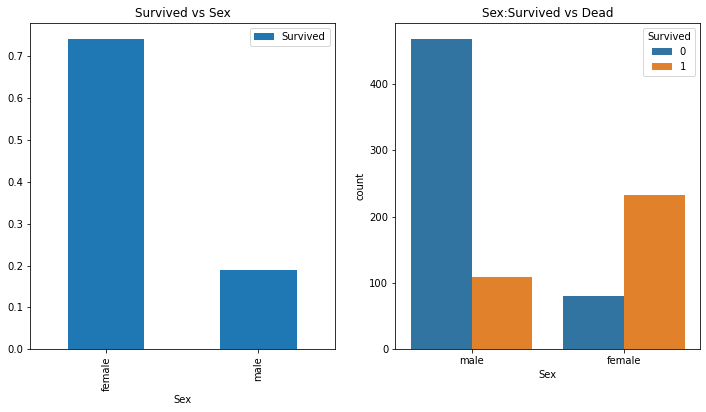

In [22]:
f,ax=plt.subplots(1,2,figsize=(12,6))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

* The number of men on the ship is lot more than the number of women. <br>
* However, the number of women saved is almost twice the number of men saved.<br>
* The survival rates for a women on the ship is around 75% while that for men in around 18-19%.<br>
* This looks like a very important feature for predicting the Survived people<br><br>

###### 'Pclass' Feature

In [23]:
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='Set3')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass:Survived vs Dead')

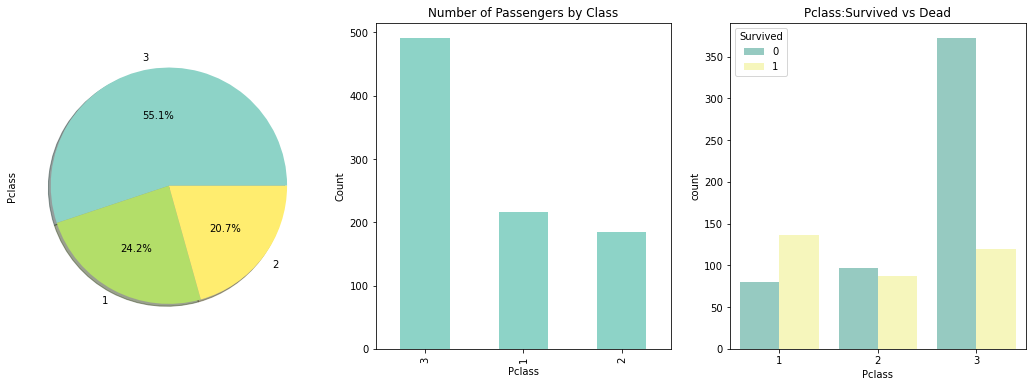

In [24]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['Pclass'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['Pclass'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title('Number of Passengers by Class')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Pclass')
sns.countplot('Pclass', hue='Survived',data=df, ax=ax[2], palette='Set3')
ax[2].set_title('Pclass:Survived vs Dead')

* From the above pie chart and bar graphs, we can see that the passenegers Of Pclass 1 has a very high chance to survive.<br>
* The number of Passengers in Pclass 3 were lot higher than Pclass 1 and Pclass 2, however the number of survival from pclass 3 is low compared to Pclass 1 and Pclass 2. <br>
* Pclass 1 %survived is around 63%, for Pclass2 is around 48%, and Pclass3 %survived is around 25%.<br><br>

We saw that 'Sex' and 'Class' are important to predict the survival rate . So, lets check survival rate with 'Sex' and 'Pclass' together.

In [25]:
pd.crosstab([df.Sex,df.Survived],df.Pclass,margins=True).style.background_gradient(cmap='Set3')

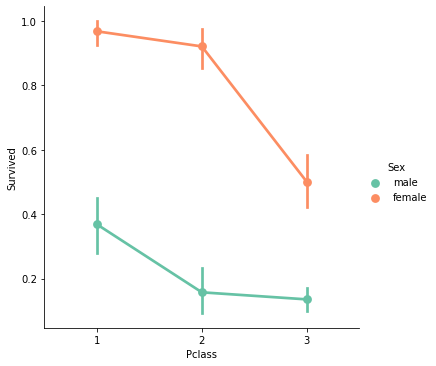

In [26]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df, palette='Set2')
plt.show()

* We can see that the survival rate of Female from Pclass1 is 95-96%, as only 3 out of 94 Women from Pclass1 died.<br>
* Female has high chance to survive<br>
* Females of Pclass 3 has more survival rate than male of Pclass 1.<br><br><br>

 ###### Age - Continuous Feature

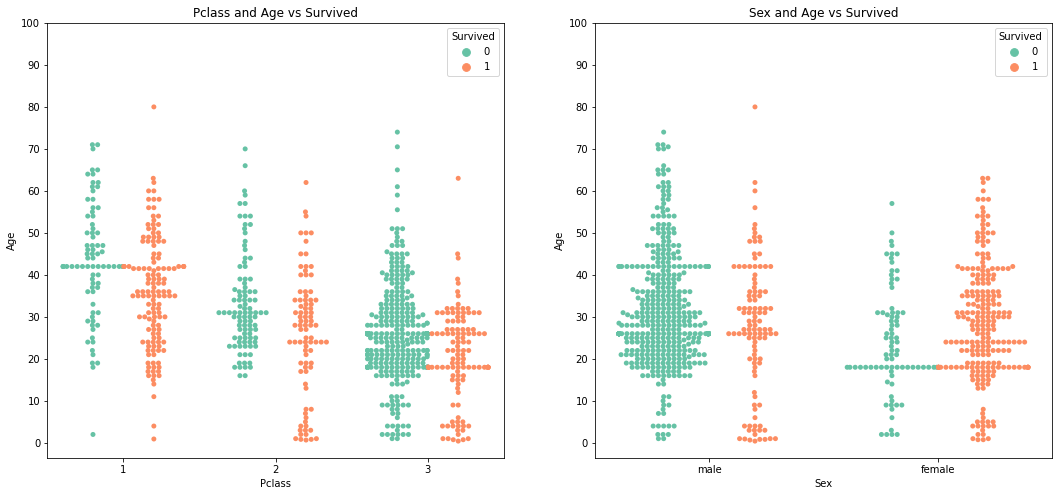

In [27]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.swarmplot("Pclass","Age", hue="Survived", data=df,split=True,ax=ax[0],palette='Set2')
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.swarmplot("Sex","Age", hue="Survived", data=df,split=True,ax=ax[1],palette='Set2')
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

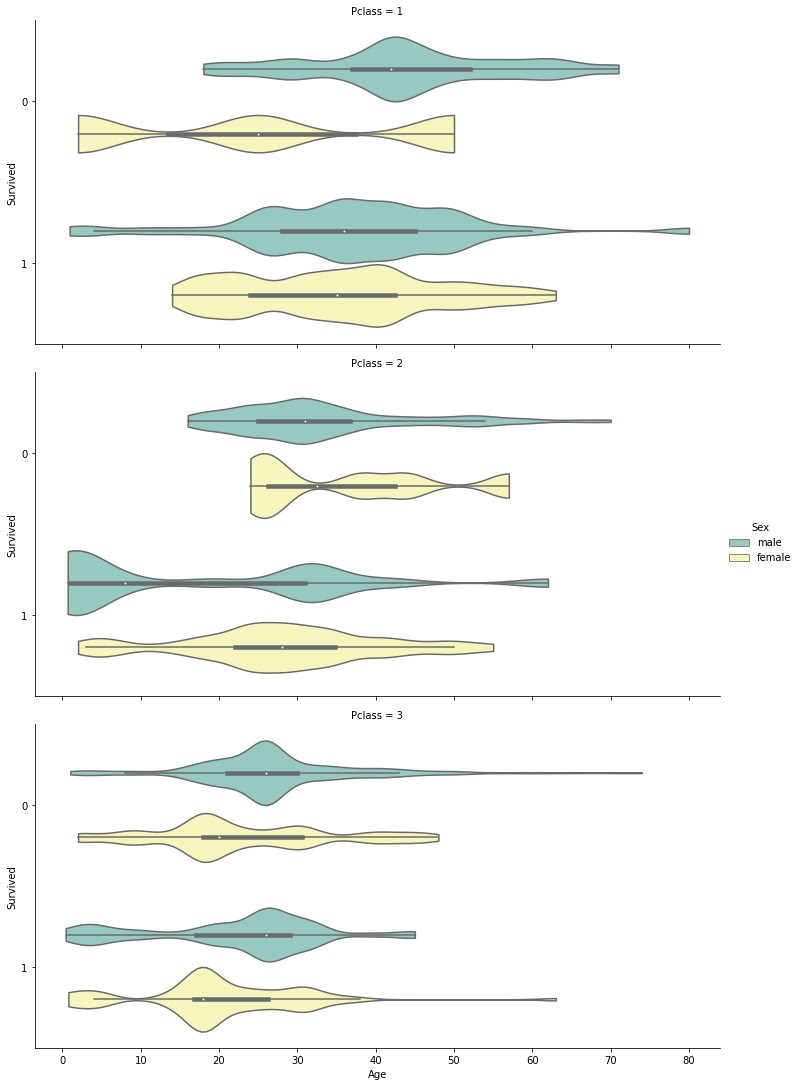

In [28]:
sns.catplot(x="Age", y="Survived",                 
                hue="Sex", row="Pclass",
                data=df,
                orient="h", aspect=2, palette="Set3",
                kind="violin", dodge=True, cut=0, bw=.2
                )

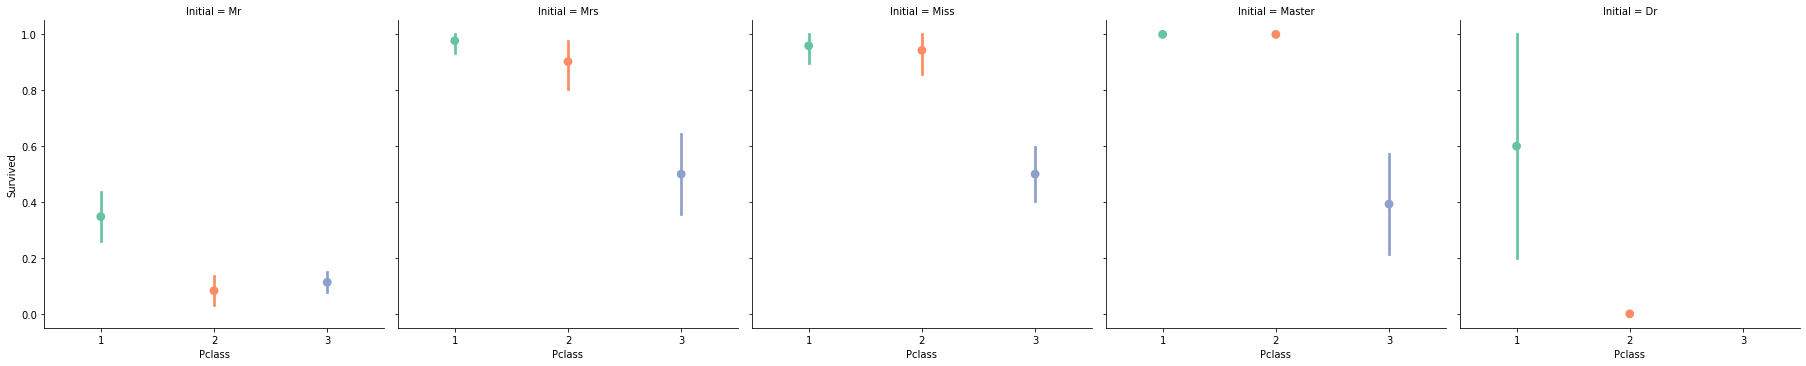

In [29]:
sns.factorplot('Pclass','Survived', col='Initial', data=df, palette='Set2')
plt.show()

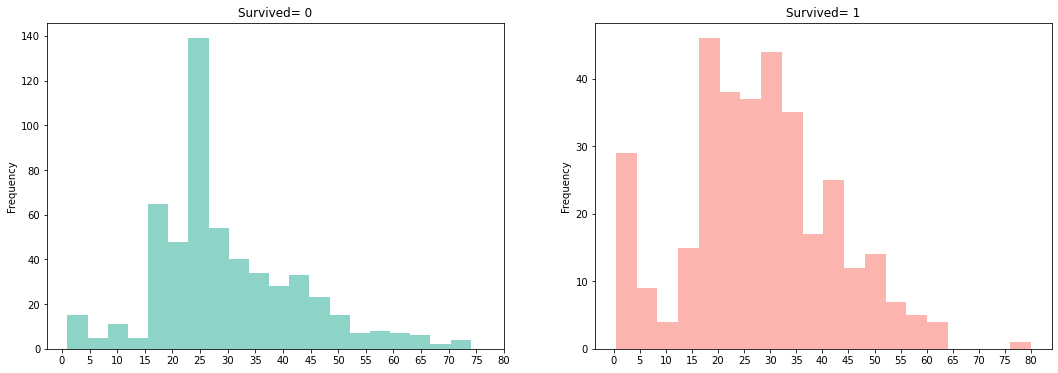

In [30]:
f,ax=plt.subplots(1,2,figsize=(18,6))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,cmap='Set3')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['Survived']==1].Age.plot.hist(ax=ax[1],bins=20, cmap='Pastel1')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)


plt.show()

<br>Let's see these two plots together.


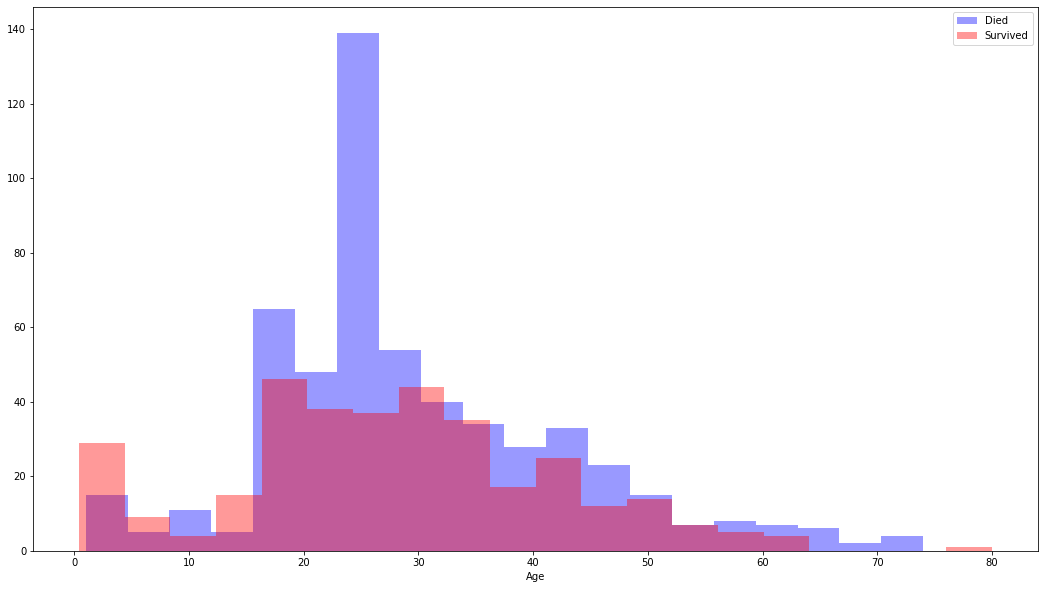

In [31]:
plt.figure(figsize=(18,10))
sns.distplot(df[df['Survived']==0].Age,bins=20, kde=False, color='b', label='Died')
sns.distplot(df[df['Survived']==1].Age,bins=20, kde=False, color='r',label='Survived')
plt.legend()

* We can see that children less than 5 years old were saved in large numbers.<br>
* The oldest survived person was 80 years old.<br><br><br>

###### 'Embarked' - Categorical Feature

In [32]:
pd.crosstab([df.Embarked, df.Pclass],[df.Sex, df.Survived], margins=True).style.background_gradient(cmap='Set3')

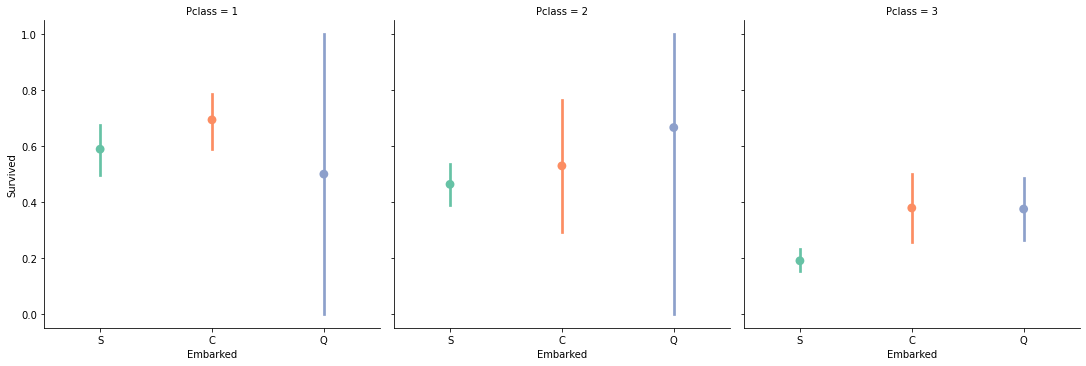

In [33]:
sns.factorplot('Embarked', 'Survived', col='Pclass',data=df, palette='Set2')

We can see that the chances for survival for Port C is highest around 0.55 while it is lowest for S.<br><br>

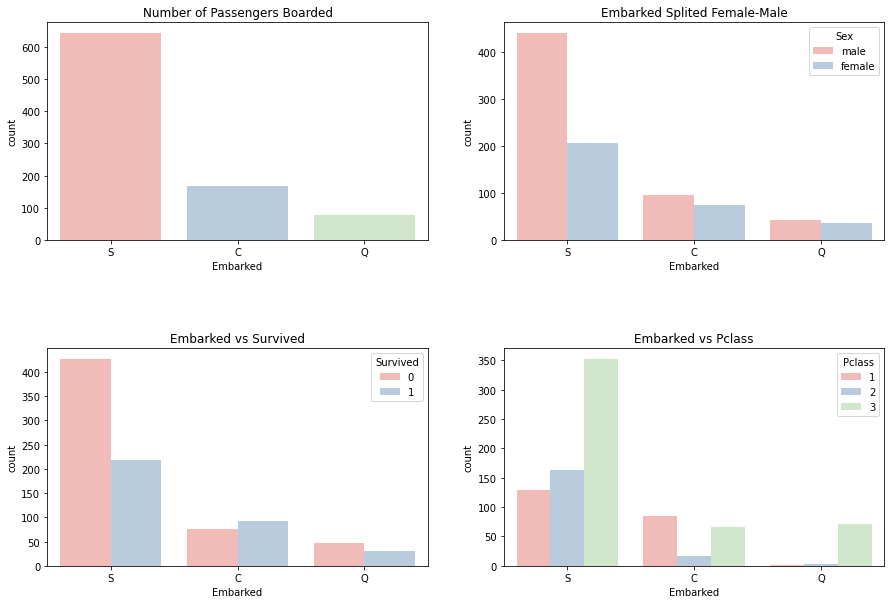

In [34]:
f, ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot('Embarked', data=df, ax= ax[0,0], palette='Pastel1')
ax[0,0].set_title('Number of Passengers Boarded')
sns.countplot('Embarked', hue='Sex',data=df, ax= ax[0,1], palette='Pastel1')
ax[0,1].set_title('Embarked Splited Female-Male')
sns.countplot('Embarked',hue='Survived', data=df, ax= ax[1,0], palette='Pastel1')
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass',data=df, ax= ax[1,1], palette='Pastel1')
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* Most of the passengers boarded form 'S'.<br>
* Most of the Pclass 3 passengers boarded form 'S'. It could be reason 'S' has more dead people.<br>
* Port 'Q' had almost 95% of the passengers were from Pclass3.<br><br>

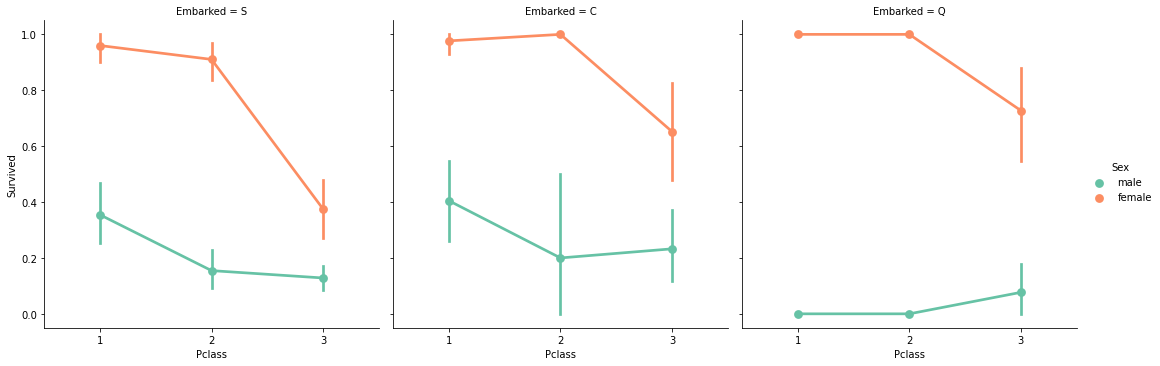

In [35]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=df, palette='Set2')
plt.show()

* The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Embarked.
*  Port S looks to be very unlucky for Pclass3 Passenegers as the survival rate for both men and women is very low.
* Port Q looks looks to be unlukiest for Men, as almost all were from Pclass 3.<br><br><br>

###### 'Sib Sp' Feature

In [36]:
pd.crosstab(df.SibSp, df.Survived, margins=True).style.background_gradient(cmap='Set3')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


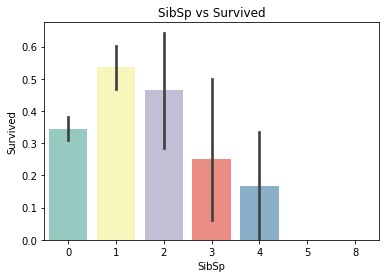

In [37]:
sns.barplot('SibSp','Survived', data=df, palette='Set3')
plt.title('SibSp vs Survived')
plt.show()

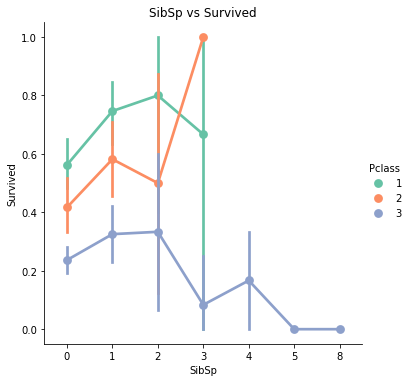

In [38]:
sns.factorplot('SibSp','Survived',data=df, hue='Pclass', palette='Set2')
plt.title('SibSp vs Survived')
plt.show()

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

The barplot and factorplot shows:

* If the passenger doesn't have any SibSp on boat, they have 34% chance to survive
* Higher chance o survival is with 1 or 2 SibSp
* There is no chance to survive with 5 0r 8 SibSp. We can see that these people are from Pclass 3. This could be also be the reason. <br><br><br>

###### 'Parch' Feature

In [39]:
pd.crosstab([df.Parch, df.Survived], df.Pclass, margins=True).style.background_gradient(cmap='Set3')

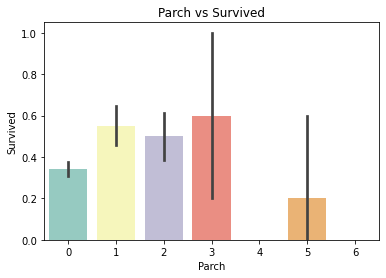

In [40]:
sns.barplot('Parch','Survived', data=df, palette='Set3')
plt.title('Parch vs Survived')
plt.show()

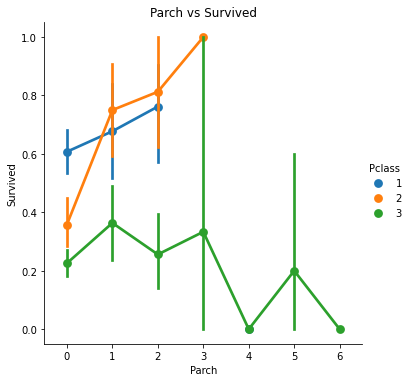

In [41]:
sns.factorplot('Parch','Survived', data=df, palatte='Set3', hue='Pclass')
plt.title('Parch vs Survived')
plt.show()

* Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.
* The chances of survival is good for somebody who has 1-3 parents on the ship. 
* Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.<br><br><br>

###### 'Fare' Feature

Text(0.5, 1.0, 'Fares in Class 3')

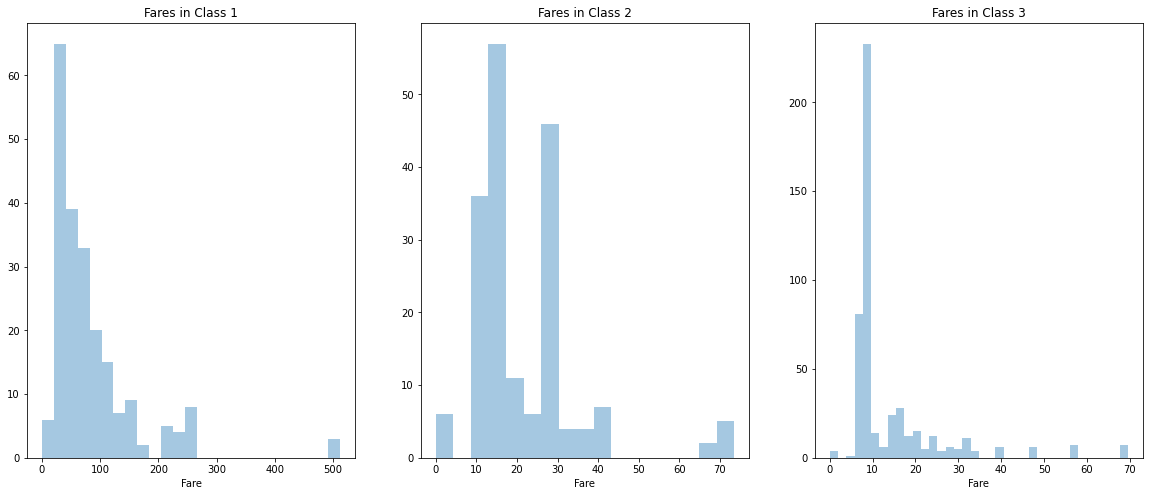

In [42]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(df[df['Pclass']==1].Fare, ax=ax[0],kde=False)
ax[0].set_title('Fares in Class 1')
sns.distplot(df[df['Pclass']==2].Fare, ax=ax[1], kde=False)
ax[1].set_title('Fares in Class 2')
sns.distplot(df[df['Pclass']==3].Fare, ax=ax[2], kde=False)
ax[2].set_title('Fares in Class 3')

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces.<br><br>

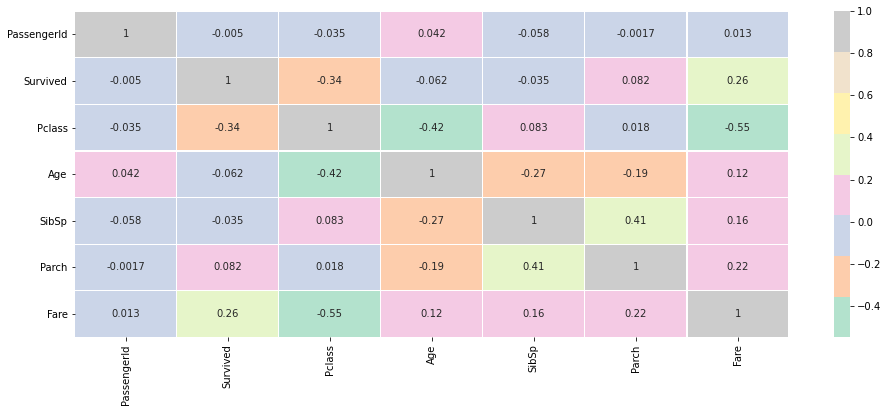

In [43]:
sns.heatmap(df.corr(),annot=True,cmap='Pastel2',linewidths=0.2, ) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.show()

* We can see that the data is not correlated with each other
* SibSp and Parch are positively correleated, the correlation value is 0.41
* Fare and Pclass negatively Correlated. It means that when the fare increase Pclass decrease. <br><br><br><br>

### Feature Engineering

##### Age

We can see that 'Age' is a continous feature, there is a problem with continous variables in Machine Learning Models.In this case, we need to convert these continous values into categorical values.<br><br>
The maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16

In [44]:
df['Age_bin'] = 0
df.loc[df['Age']<16,'Age_bin'] = 0
df.loc[(df['Age']>16) & (df['Age']<=32),'Age_bin'] =1
df.loc[(df['Age']>32) & (df['Age']<=48),'Age_bin'] =2
df.loc[(df['Age']>48) & (df['Age']<=64),'Age_bin'] =3
df.loc[df['Age']>64,'Age_bin'] =4

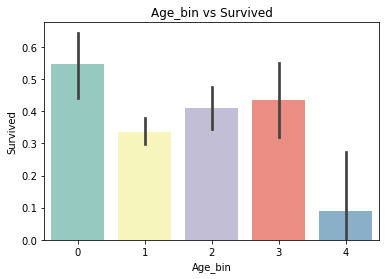

In [45]:
sns.barplot('Age_bin','Survived', data=df, palette='Set3')
plt.title('Age_bin vs Survived')
plt.show()

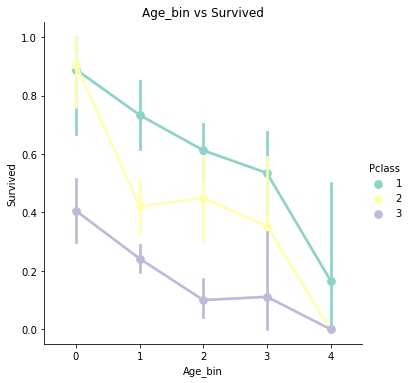

In [46]:
sns.factorplot('Age_bin','Survived', data=df, palette='Set3', hue="Pclass")
plt.title('Age_bin vs Survived')
plt.show()

We can see that the survival rate decreases as the age increases irrespective of the Pclass.<br><br><br>

##### Family Size And Is Alone

Here we are going to create a new feature called "Family_size" and "Alone" and analyse it.<br>
This feature is the summation of Parch and SibSp.<br>
It gives us a combined data so that we can check if survival rate is correlated with family size of the passengers. <br>
Alone will denote whether a passenger is alone or not.

In [47]:
df['Family_size'] = 0
df['Family_size'] = df['Parch'] + df['SibSp']
df['Is_Alone'] = 0
df.loc[df.Family_size == 0, 'Is_Alone'] =1

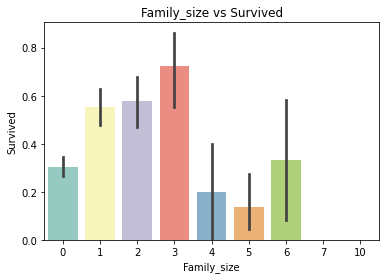

In [48]:
sns.barplot('Family_size','Survived', data=df, palette='Set3')
plt.title('Family_size vs Survived')
plt.show()

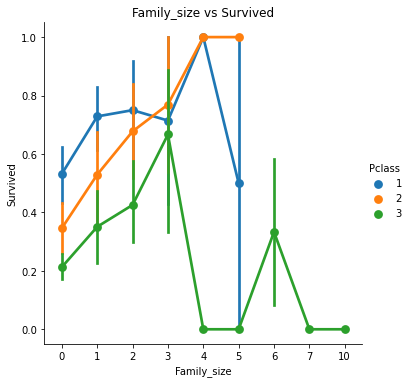

In [49]:
sns.factorplot('Family_size','Survived', data=df, palatte='Set3', hue='Pclass')
plt.title('Family_size vs Survived')
plt.show()

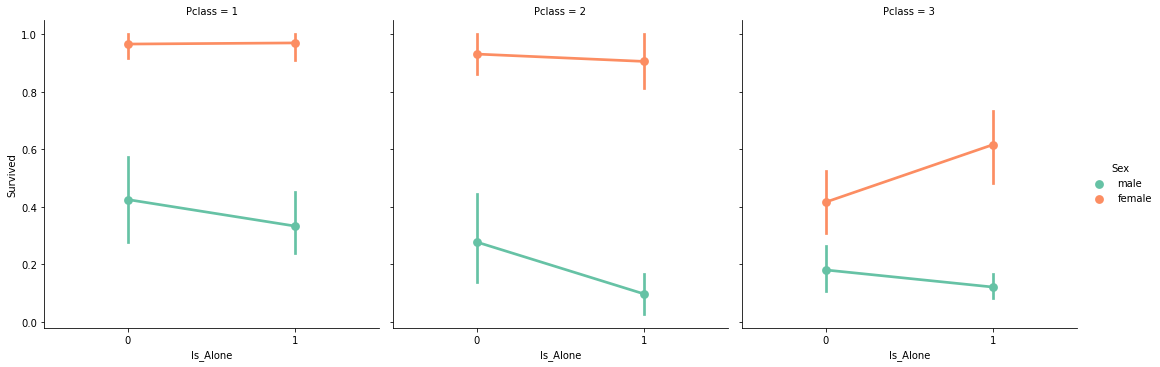

In [50]:
sns.factorplot('Is_Alone','Survived',data=df,hue='Sex',col='Pclass',palette='Set2')
plt.show()

<br><br><br>

##### Fare Range

Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.

In [51]:
df['Fare_Range']=pd.qcut(df['Fare'],4)
df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [52]:
df['Fare_cat'] = 0
df.loc[df['Fare']<=7.91,'Fare_cat'] = 0
df.loc[(df['Fare']>7.91) & (df['Fare']<=14.454),'Fare_cat'] = 1
df.loc[(df['Fare']>14.454) & (df['Fare']<=31.0), 'Fare_cat'] = 2
df.loc[(df['Fare']>31.0) & (df['Fare']<=513), 'Fare_cat'] = 3

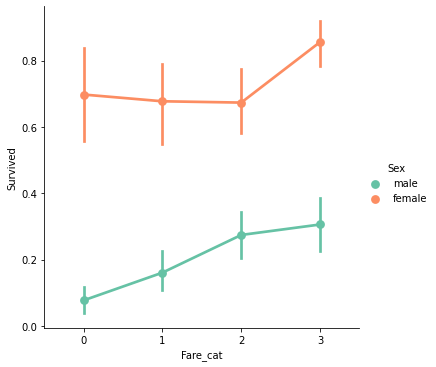

In [53]:
sns.factorplot('Fare_cat','Survived',data=df,hue='Sex',palette='Set2')
plt.show()

When the Fare_cat increases, survival chance also increases.

<br><br>Converting string values to numeric values

In [54]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)

df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

df['Initial'].replace(['Mr','Mrs','Miss','Master','Other', 'Dr'],[0,1,2,3,4,5],inplace=True)

Creating Class 'Embark' and 'Sex' feature together

In [55]:
df['Sex_Class_Embark'] = 0 
df.loc[(df['Sex'] == 1) & ((df['Pclass'] == 1) | (df['Pclass'] == 2) ) & 
((df['Embarked'] == 0)  | (df['Embarked'] == 1)  | (df['Embarked'] == 2)),'Sex_Class_Embark'] = 0
    
df.loc[(df['Sex'] == 1) & (df['Pclass'] == 3) & ((df['Embarked'] == 1)  | (df['Embarked'] == 2)),'Sex_Class_Embark'] = 1

df.loc[(df['Sex'] == 0) & (df['Pclass'] == 1) & ((df['Embarked'] == 0)  | (df['Embarked'] == 1)),'Sex_Class_Embark'] = 2
df.loc[(df['Sex'] == 1) & (df['Pclass'] == 3) & (df['Embarked'] == 0),'Sex_Class_Embark'] = 2
    
df.loc[(df['Sex'] == 0) & ((df['Pclass'] == 2)  | (df['Pclass'] == 3) ) & 
((df['Embarked'] == 0)  | (df['Embarked'] == 1)  | (df['Embarked'] == 2)),'Sex_Class_Embark'] = 3
    
df.loc[(df['Sex'] == 0) & ((df['Pclass'] == 1)  |(df['Pclass'] == 2) ) & (df['Embarked'] == 2),'Sex_Class_Embark'] = 4

In [56]:
df['Sex_Class_Embark'].unique()

array([3, 0, 2, 1, 4], dtype=int64)

In [57]:
df['Initial'].unique()

array([0, 1, 2, 3, 5], dtype=int64)

In [58]:
df['Initial']

0      0
1      1
2      2
3      1
4      0
      ..
886    0
887    2
888    2
889    0
890    0
Name: Initial, Length: 891, dtype: int64

<br><br>
###### Dropping UnNeeded Features
<br>
Name--> We don't need 'Name' feature as it cannot be converted into any categorical value.

Age--> We have the Age_band feature, so no need of this.

Ticket--> It is any random string that cannot be categorised.

Fare--> We have the Fare_cat feature, so 'Fare' is not needed

Cabin--> A lot of NaN values and also many passengers have multiple cabins. So this is not a useful feature.

Fare_Range--> We have the fare_cat feature.

PassengerId--> Cannot be categorised.

df.head()

In [59]:
df.drop(['Name','Age','Ticket','Fare','Fare_Range','PassengerId'],axis=1,inplace=True)

<br>Dataset has one more column which is 'survived' column, we are going to use this column as target variable

In [60]:
print(df.shape)

(891, 12)


In [61]:
df.dtypes

Survived            int64
Pclass              int64
Sex                 int64
SibSp               int64
Parch               int64
Embarked            int64
Initial             int64
Age_bin             int64
Family_size         int64
Is_Alone            int64
Fare_cat            int64
Sex_Class_Embark    int64
dtype: object

In [62]:
df["Initial"].value_counts()

0    531
2    186
1    127
3     40
5      7
Name: Initial, dtype: int64

In [63]:
df["Initial"].dtype

dtype('int64')

In [64]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
for column in df.columns:
    df['Survived'] = labelencoder.fit_transform(df["Survived"])

In [65]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
df['Initial'] = labelencoder.fit_transform(df["Initial"])

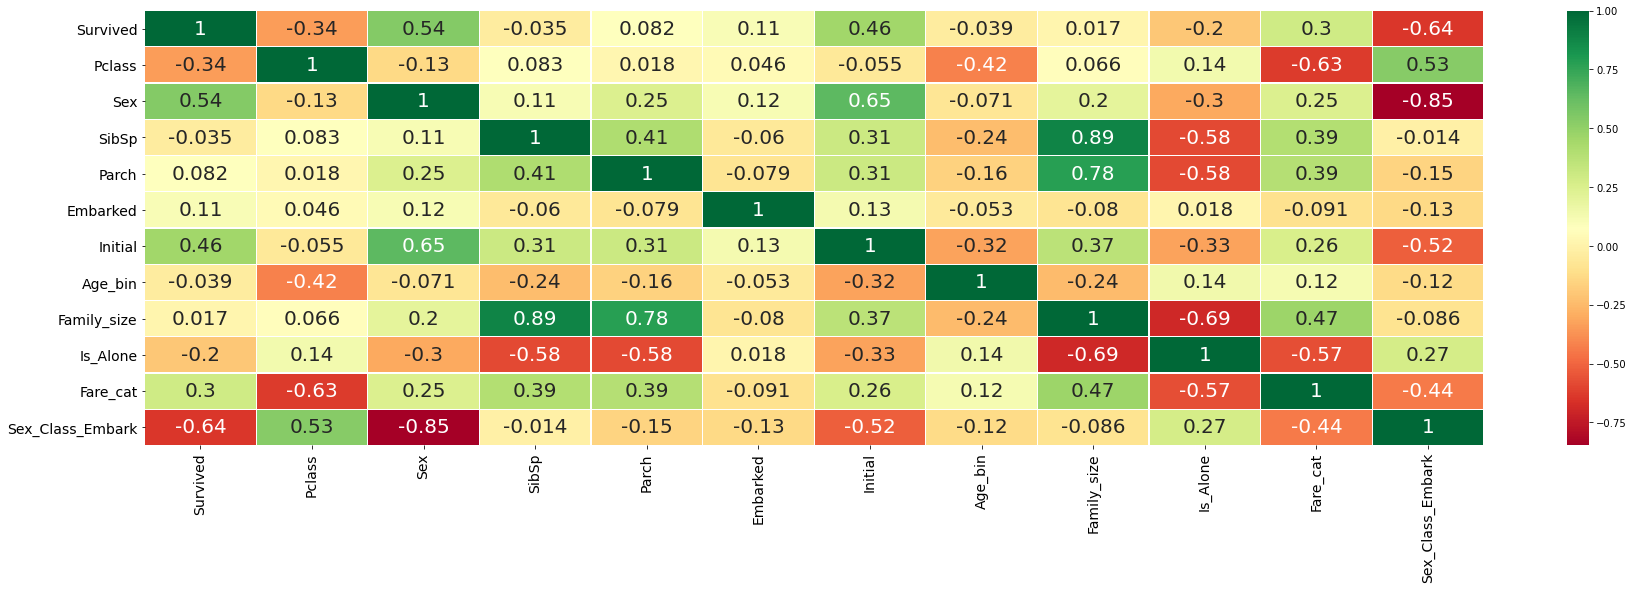

In [66]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(30,8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

This heatmap shows the correleation between the columns of the dataset

<br><br>

### Predictive Modeling

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import GridSearchCV

<br>Splitting data for validation


In [68]:
X=df.drop(['Survived'], axis=1)
y=df['Survived']

In [69]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [70]:
print(X_train.shape, y_train.shape)

(623, 11) (623,)


#### <br> -----> Checking Accuracies

###### Logistic Regression

In [71]:
model_log = LogisticRegression(solver='liblinear')
model_log.fit(X_train, y_train)
prediction_log = model_log.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_log, y_test))

The accuracy of the Logistic Regression is 0.8246268656716418


##### Decision Tree

In [72]:
model_tree = DecisionTreeClassifier() 
model_tree.fit(X_train, y_train)
prediction_tree = model_tree.predict(X_test)
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction_tree, y_test))

The accuracy of the Decision Tree is  0.8246268656716418


###### K-Nearest Neighbours(KNN)

In [73]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
prediction_knn = model_knn.predict(X_test)
print('The accuracy of the  K-Nearest Neighbours is ', metrics.accuracy_score(prediction_knn, y_test))

The accuracy of the  K-Nearest Neighbours is  0.8171641791044776


###### checking the accuracies over various values of n_neighbours.

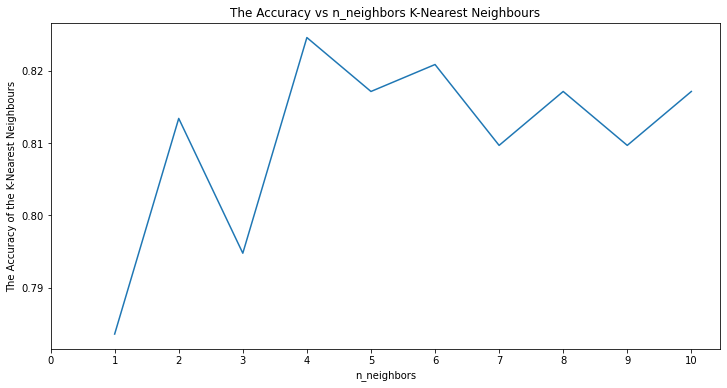

In [74]:
s =pd.Series()
for i in list(range(1,11)):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train, y_train)
    prediction_knn = model_knn.predict(X_test)
    s = s.append(pd.Series(metrics.accuracy_score(prediction_knn, y_test)))

plt.plot(list(range(1,11)), s)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.title('The Accuracy vs n_neighbors K-Nearest Neighbours')
plt.xlabel('n_neighbors')
plt.ylabel('The Accuracy of the K-Nearest Neighbours')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

##### Linear Support Vector Machine(linear-SVM)

In [75]:
model_svm_l = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model_svm_l.fit(X_train, y_train)
prediction_svm_l = model_svm_l.predict(X_test)
print('The accuracy of the Linear Support Vector Machine is ', metrics.accuracy_score(prediction_svm_l, y_test))

The accuracy of the Linear Support Vector Machine is  0.8171641791044776


##### Random Forest

In [76]:
model_random = RandomForestClassifier(n_estimators=300)
model_random.fit(X_train, y_train)
predict_random = model_random.predict(X_test)
print('The accuracy of the  Random Forest is ', metrics.accuracy_score(predict_random, y_test))

The accuracy of the  Random Forest is  0.832089552238806


##### Gaussian Naive Bayes

In [77]:
model_gaus = GaussianNB()
model_gaus.fit(X_train, y_train)
prediction_gaus = model_gaus.predict(X_test)
print('The accuracy of the  Gaussian Naive Bayes is ', metrics.accuracy_score(prediction_gaus, y_test))

The accuracy of the  Gaussian Naive Bayes is  0.8059701492537313


#### <br> -----> Checking Cross Validation Scores

In [78]:
from sklearn.model_selection import KFold
from  sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [79]:
kfold =KFold(n_splits=10, random_state=22)
xyz = []
accuracy = []
std = []

In [80]:
classifiers = ['Linear SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes' , 'Random Forest']
models = [svm.SVC(kernel='linear'), LogisticRegression(solver='liblinear'), KNeighborsClassifier(n_neighbors=9), 
      DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]


models = [svm.SVC(kernel='linear'), LogisticRegression(solver='liblinear'), KNeighborsClassifier(n_neighbors=9), 
      DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

In [81]:
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv=kfold,scoring='accuracy')
    cv_result =cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)

In [82]:
new_models_data_frame = pd.DataFrame({'Cross Validation Score Mean': xyz}, index=classifiers)
new_models_data_frame

,Cross Validation Score Mean
Linear SVM,0.836117
Logistic Regression,0.818152
KNN,0.823833
Decision Tree,0.802522
Naive Bayes,0.810362
Random Forest,0.817116


###### Confusion Matrix for the above models

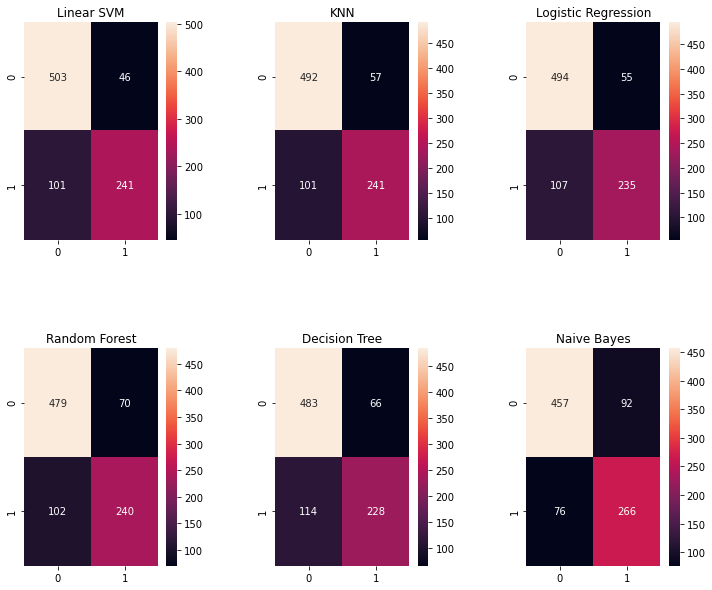

In [83]:
f, ax  =plt.subplots(2,3, figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[0,0], annot=True,fmt='2.0f')
ax[0,0].set_title('Linear SVM')


y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9) ,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[0,1], annot=True,fmt='2.0f')
ax[0,1].set_title('KNN')

y_pred = cross_val_predict(LogisticRegression(solver='liblinear') ,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[0,2], annot=True,fmt='2.0f')
ax[0,2].set_title('Logistic Regression')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100) ,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[1,0], annot=True,fmt='2.0f')
ax[1,0].set_title('Random Forest')

y_pred = cross_val_predict(DecisionTreeClassifier() ,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[1,1], annot=True,fmt='2.0f')
ax[1,1].set_title('Decision Tree')

y_pred = cross_val_predict(GaussianNB() ,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[1,2], annot=True,fmt='2.0f')
ax[1,2].set_title('Naive Bayes')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

* Left diagonal shows the number of correct predictions made for each class
* Right diagonal shows the number of wrong predictions made
* For Radical - SVM<br>
  --->503 for dead and 241 for survived predicted correctly<br>
  --->101 for dead and 46 for survived predicded wrong
* Naive Bayes has a higher change in correcly predicting survived people

### Hyper-Parameter Tuning

##### Tuning the two best classifiers

<br>SVM Model

In [84]:
from sklearn.model_selection import GridSearchCV
C=[0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd =GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)


gd.fit(X,y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 130 candidates, totalling 650 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8316238779737619
SVC(C=0.2, gamma=0.1, kernel='linear')


[Parallel(n_jobs=1)]: Done 650 out of 650 | elapsed:   15.5s finished


In [85]:
model_linear = svm.SVC(kernel='linear', C=0.35, gamma=0.1)
model_linear.fit(X_train, y_train)
prediction_linear = model_linear.predict(X_test)
print('The accuracy of the Linear Support Vector Machine Model is ', metrics.accuracy_score(prediction_linear, y_test))

The accuracy of the Linear Support Vector Machine Model is  0.8246268656716418


<br> Random Forest Model

In [86]:
n_estimator =range(50, 1000, 50)
hyper = {'n_estimators': n_estimator}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:  2.3min finished


0.8204506936162199
RandomForestClassifier(n_estimators=400, random_state=0)


We can see that the SVM Model has the highest accuracy of 0.8246268656716418 after Hyper Parameter Tuning. So considering SVM Model as best model for this project.

<br><br>

In [89]:
gd.best_params_

{'n_estimators': 400}

In [92]:
from sklearn.metrics import r2_score, mean_squared_error
best_reg = gd.best_estimator_
y_pred = best_reg.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

0.31147219036879414

##### Predictions

In [96]:
OutputDF=pd.DataFrame({'Actual Data':y_test,'Predicted Data':y_pred})
OutputDF.head()

,Actual Data,Predicted Data
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1


### Saving the Model

In [101]:
import joblib

In [103]:
joblib.dump(model_svm_l, 'titanic_project.pkl')


['titanic_project.pkl']

In [104]:
# Load the model from the file
model_svm_l_from_joblib = joblib.load('titanic_project.pkl') 

In [105]:
# Use the loaded model to make predictions
model_svm_l_from_joblib.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)